# Demonstração do Teorema da Convolução


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import sys,os
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Caso numérico

In [3]:
fr = np.linspace(-1,1,6)
f  = np.array([fr,2*fr,fr,fr])
print(f)

[[-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]]


In [4]:
hh = np.array([-1,0,+1])
h = np.array([hh,2*hh,hh])
print(h)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [5]:
g = ia.pconv(f,h)
print(g)

[[ 6.4  6.4 -3.2 -3.2 -3.2 -3.2]
 [ 8.   8.  -4.  -4.  -4.  -4. ]
 [ 9.6  9.6 -4.8 -4.8 -4.8 -4.8]
 [ 8.   8.  -4.  -4.  -4.  -4. ]]


## Lembrar que tanto f como h são imagens periódicas e o período de ambas é de (H,W) que é o shape de f

Na linha abaixo, F e H devem ter o mesmo shape

In [10]:
F = np.fft.fft2(f)
haux = np.zeros(f.shape)
Hh, Wh = h.shape
haux[:Hh,:Wh] = h 
H = np.fft.fft2(haux)
G = F * H
gg = np.fft.ifft2(G)
print(gg.real)

[[ 6.4  6.4 -3.2 -3.2 -3.2 -3.2]
 [ 8.   8.  -4.  -4.  -4.  -4. ]
 [ 9.6  9.6 -4.8 -4.8 -4.8 -4.8]
 [ 8.   8.  -4.  -4.  -4.  -4. ]]


### gg deve ser igual ao g

In [11]:
print('Teorema convolução funcionou?', np.allclose(gg.real,g)) 

Teorema convolução funcionou? True


## Agora para o caso de uma imagem usual, por exemplo a keyb

## Visualizem também o H

Teorema convolução funcionou? True


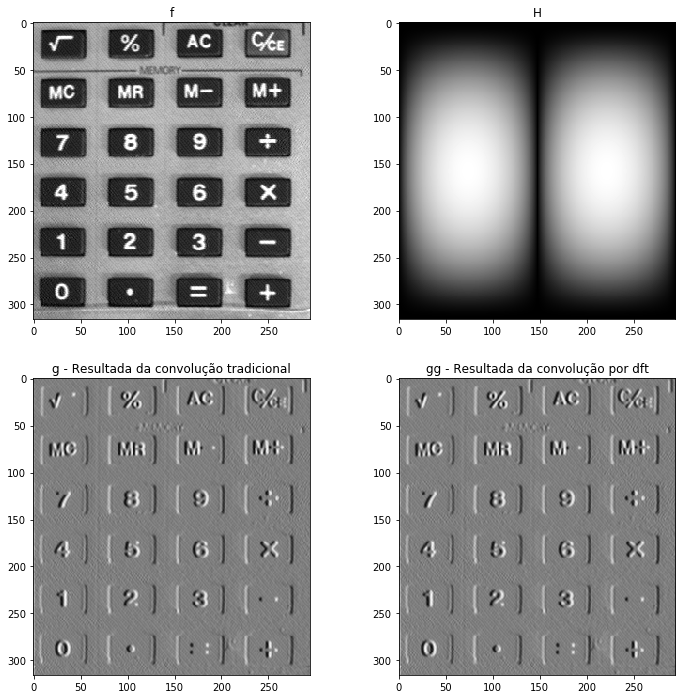

In [26]:
f2 = mpimg.imread('/home/lotufo/ia898/data/keyb.tif')

hh = np.array([-1,0,+1])
h = np.array([hh,2*hh,hh])

g2 = ia.pconv(f2,h) #Convolução tradicional 

haux = np.zeros(f2.shape)
Hh, Wh = h.shape
haux[:Hh,:Wh] = h

#Convolução por dft
F2 = np.fft.fft2(f2)
H2 = np.fft.fft2(haux)
G2 = F2 * H2
gg2 = np.fft.ifft2(G2)

nr, nc = F2.shape

plt.figure(1, figsize=(12,12))
plt.subplot(221)
plt.imshow(f2,cmap='gray')
plt.title('f')
plt.subplot(222)
plt.imshow(ia.ptrans(np.log(1+ np.abs(H2)),(nr//2,nc//2)),cmap='gray')
plt.title('H')
plt.subplot(223)
plt.imshow(g2,cmap='gray')
plt.title('g - Resultada da convolução tradicional')
plt.subplot(224)
plt.imshow(gg2.real,cmap='gray')
plt.title('gg - Resultada da convolução por dft')

print('Teorema convolução funcionou?', np.allclose(gg2.real,g2)) 